In [2]:
from IPython.display import Latex, Math, Markdown, Latex, display
import cv2
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    return r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'
    
Markdown(r'# LEC 2: Interpolation and Spatial Transformations')

# LEC 2: Interpolation and Spatial Transformations

## Translation transform

<IPython.core.display.Math object>

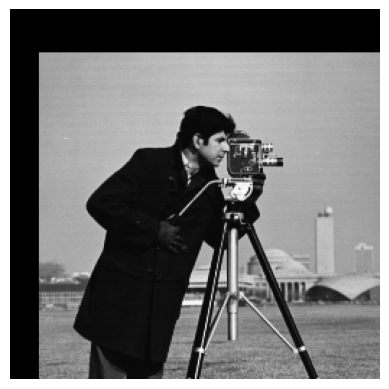

In [3]:
display(Markdown(r'## Translation transform'))
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
T = np.array([[1, 0, 0],
              [0, 1, 0],
              [30, 20, 1]])
display(Math(f'T = {print_matrix(T)}'))
trans = np.zeros(img.shape)
Tflip = T.T
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        p = np.array([i, j, 1])
        p = np.dot(Tflip, p)
        p = p.astype(int)
        if 0 <= p[0] < img.shape[0] and 0 <= p[1] < img.shape[1]:
            trans[tuple(p[:2])] = img[i, j]

plt.imshow(trans, cmap='gray')
plt.axis('off')
plt.show()

## Rotation transform

<IPython.core.display.Math object>

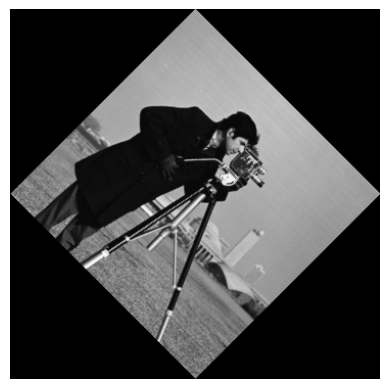

In [4]:
display(Markdown(r'## Rotation transform'))
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
def ModifiedWay(rotateImage, angle):
    
    # Taking image height and width
    imgHeight, imgWidth = rotateImage.shape[0], rotateImage.shape[1]
  
    # Computing the centre x,y coordinates
    # of an image
    centreY, centreX = imgHeight//2, imgWidth//2
  
    # Computing 2D rotation Matrix to rotate an image
    rotationMatrix = cv2.getRotationMatrix2D((centreY, centreX), angle, 1.0)
  
    # Now will take out sin and cos values from rotationMatrix
    # Also used numpy absolute function to make positive value
    cosofRotationMatrix = np.abs(rotationMatrix[0][0])
    sinofRotationMatrix = np.abs(rotationMatrix[0][1])
  
    # Now will compute new height & width of
    # an image so that we can use it in
    # warpAffine function to prevent cropping of image sides
    newImageHeight = int((imgHeight * sinofRotationMatrix) +
                         (imgWidth * cosofRotationMatrix))
    newImageWidth = int((imgHeight * cosofRotationMatrix) +
                        (imgWidth * sinofRotationMatrix))
  
    # After computing the new height & width of an image
    # we also need to update the values of rotation matrix
    rotationMatrix[0][2] += (newImageWidth/2) - centreX
    rotationMatrix[1][2] += (newImageHeight/2) - centreY
  
    # Now, we will perform actual image rotation
    rotatingimage = cv2.warpAffine(
        rotateImage, rotationMatrix, (newImageWidth, newImageHeight))
  
    return rotatingimage

display(Math(f'T = {print_matrix(T)}'))
plt.imshow(ModifiedWay(img, -45), cmap='gray')
plt.axis('off')
plt.show()


## Shear

<IPython.core.display.Math object>

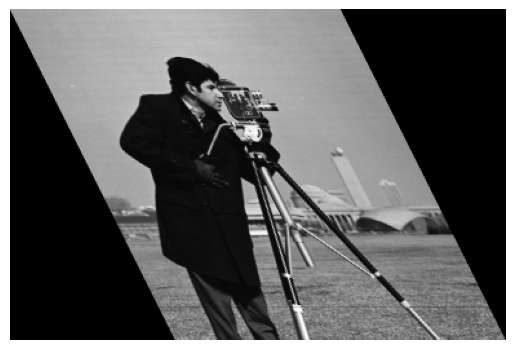

In [5]:
display(Markdown(r'## Shear'))
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
T = np.array([[1, 0.5, 0],
            [0, 1, 0],
            [0, 0, 1]])
display(Math(f'T = {print_matrix(T)}'))
shear = np.zeros(img.shape)
#Tflip = T.T
plt.imshow(cv2.warpPerspective(img,T,(int(img.shape[0]*1.5), img.shape[1]),flags=cv2.INTER_LINEAR), cmap='gray')
plt.axis('off')
plt.show()

## Warp Affine

<IPython.core.display.Math object>

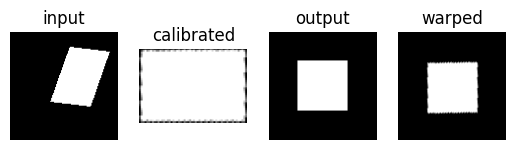

In [40]:
%matplotlib inline
display(Markdown(r'## Warp Affine'))
input = cv2.imread("input.tif", cv2.IMREAD_GRAYSCALE)
output = cv2.imread("output.tif", cv2.IMREAD_GRAYSCALE)

in_A = [40, 70]
in_B = [80, 75]
in_C = [100, 20]
in_D = [60, 15]

out_A = [30, 30]
out_B = [30, 80]
out_C = [80, 80]
out_D = [80, 30]


in_pts = np.array([in_A, in_B, in_C, in_D], np.int32)
input_fit = cv2.polylines(input.copy(),[in_pts],True,(0,255,255))
# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((in_A[0] - in_D[0]) ** 2) + ((in_A[1] - in_D[1]) ** 2))
width_BC = np.sqrt(((in_B[0] - in_C[0]) ** 2) + ((in_B[1] - in_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((in_A[0] - in_B[0]) ** 2) + ((in_A[1] - in_B[1]) ** 2))
height_CD = np.sqrt(((in_C[0] - in_D[0]) ** 2) + ((in_C[1] - in_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))
in_pts = np.float32([in_A, in_B, in_C, in_D])
out_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])
# Compute the perspective transform M
M_calib = cv2.getPerspectiveTransform(in_pts,out_pts)
out_pts = np.float32([out_A, out_B, out_C, out_D])
M = cv2.getPerspectiveTransform(in_pts,out_pts)

display(Math(f'T = {print_matrix(M)}'))

f, axarr = plt.subplots(1,4) 
axarr[0].imshow(input, cmap='gray')
axarr[0].set_title('input')
axarr[1].imshow(cv2.warpPerspective(input_fit,M_calib,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR), cmap='gray')
axarr[1].set_title('calibrated')
axarr[2].imshow(output, cmap='gray')
axarr[2].set_title('output')
axarr[3].imshow(cv2.warpPerspective(input,M,input.shape,flags=cv2.INTER_LINEAR), cmap='gray')
axarr[3].set_title('warped')
for i in range(4):
    axarr[i].axis('off')
plt.show()

## Affine Transform

<IPython.core.display.Math object>

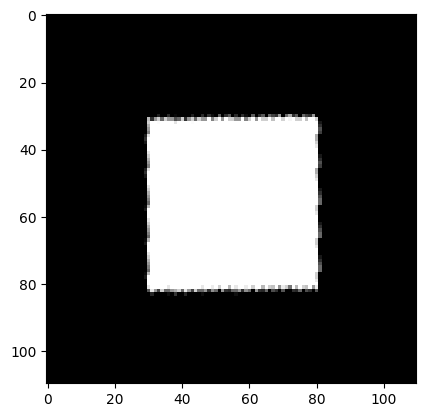

In [128]:
display(Markdown(r'## Affine Transform'))

U = np.array([in_A+[1], in_B+[1], in_C+[1], in_D+[1]])
X = np.array([out_A+[1], out_B+[1], out_C+[1], out_D+[1]])
UTU = np.dot(U.T, U)
UTUinv = np.linalg.inv(UTU)
UTUinvUT = np.dot(UTUinv, U.T)
T = np.dot(UTUinvUT, X)


s = f'X = {print_matrix(X)} U = {print_matrix(U)} \quad \Rightarrow ' 
s += f' X = {print_matrix(X)} = {print_matrix(U)} \cdot T \quad \Rightarrow '
s += f'U^{{T}} X = U^{{T}}UT \Rightarrow \quad '
s += f' (U^{{T}}U)^{{-1}} U^{{T}} X = T \\\\ \quad \Rightarrow '
s += f' T = {print_matrix(UTU)}^{{-1}} \cdot {print_matrix(U.T)} \cdot {print_matrix(X)}'
s += f' = {print_matrix(np.round(UTUinv, 4))} \cdot {print_matrix(U.T)} \cdot {print_matrix(X)} \\\\'
s += f' = {print_matrix(np.round(UTUinvUT, 4))} \cdot {print_matrix(X)} = {print_matrix(T)} = T'
display(Math(s))
plt.imshow(cv2.warpPerspective(input,T.T, input.shape,flags=cv2.INTER_LINEAR), cmap='gray')
plt.show()


In [155]:
display(Markdown(r'## practice Affine transform'))
x1,y1 = 82,18
xy1 = np.dot([x1, y1, 1], T)

display(Math(f'U({x1},{y1}) = {print_matrix(np.array([{x1},{y1},1]))} \cdot T = {print_matrix(xy1)} = X({xy1[0].astype(int)},{xy1[1].astype(int)})'))

Tinv = np.linalg.inv(T)
x2,y2 = 30,55
xy2 = np.dot([x2, y2, 1], Tinv)

display(Math(f'X({x2},{y2}) = {print_matrix(np.array([{x2},{y2},1]))} \cdot T^{{-1}} = {print_matrix(xy2)} = U({xy2[0].astype(int)},{xy2[1].astype(int)})'))


## practice Affine transform

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Isopreference

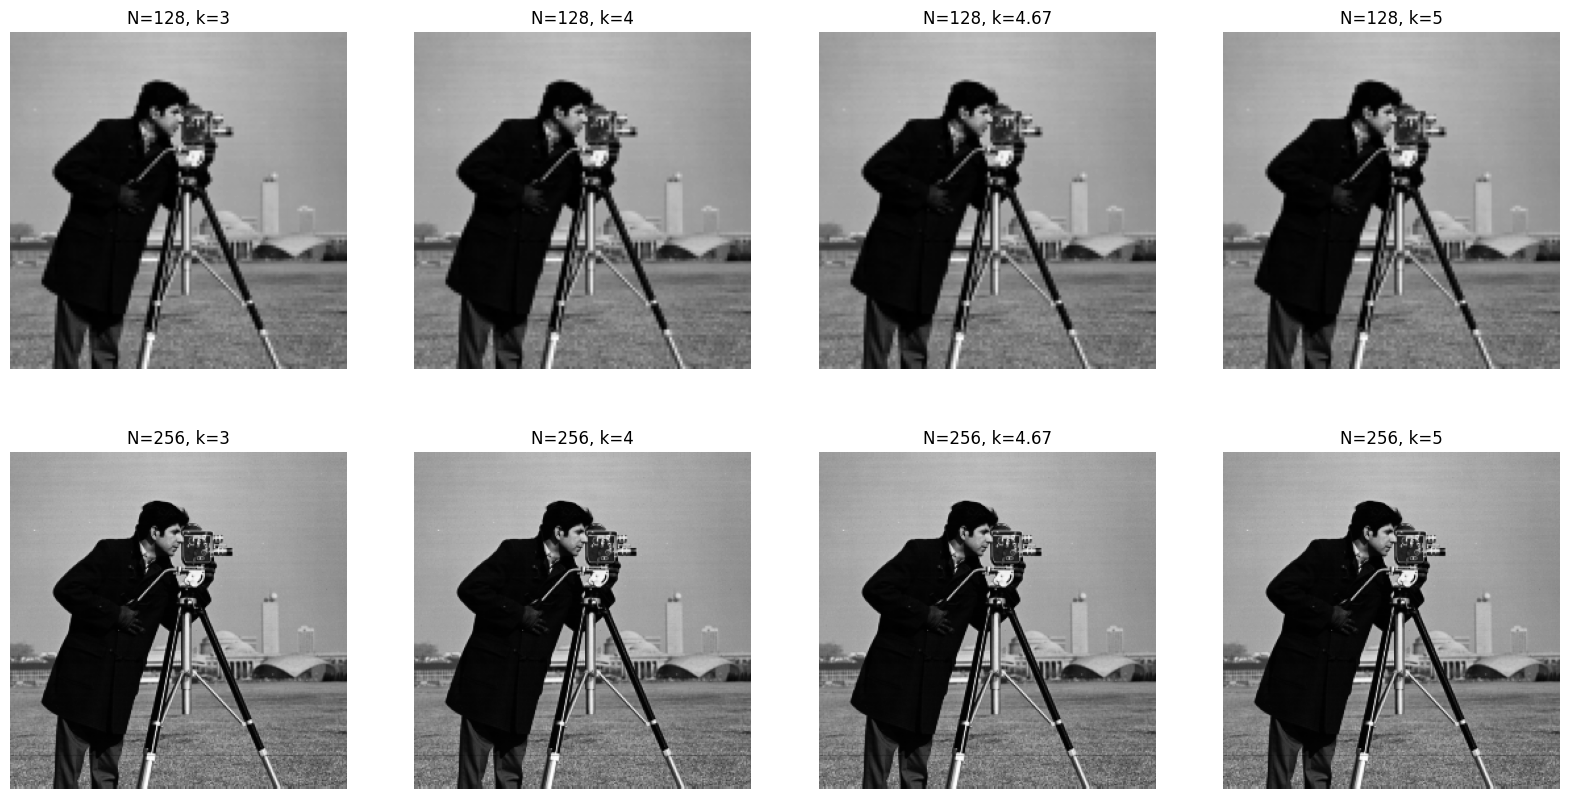

In [8]:
display(Markdown(r'## Isopreference'))

def iso(img, N, k):
    res = cv2.resize(img, (N,N))
    return res * ((2**k-1)/255)

img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

Ns = [128, 256]
ks = [3, 4, 4.67, 5]
_, ax = plt.subplots(len(Ns), len(ks), figsize=(len(ks)*5, len(Ns)*5))

for i,N in enumerate(Ns):
    for j,k in enumerate(ks):
        ax[i][j].imshow(iso(img, N, k), cmap='gray')
        ax[i][j].set_title(f'N={N}, k={k}')
        ax[i][j].axis('off')
plt.show()

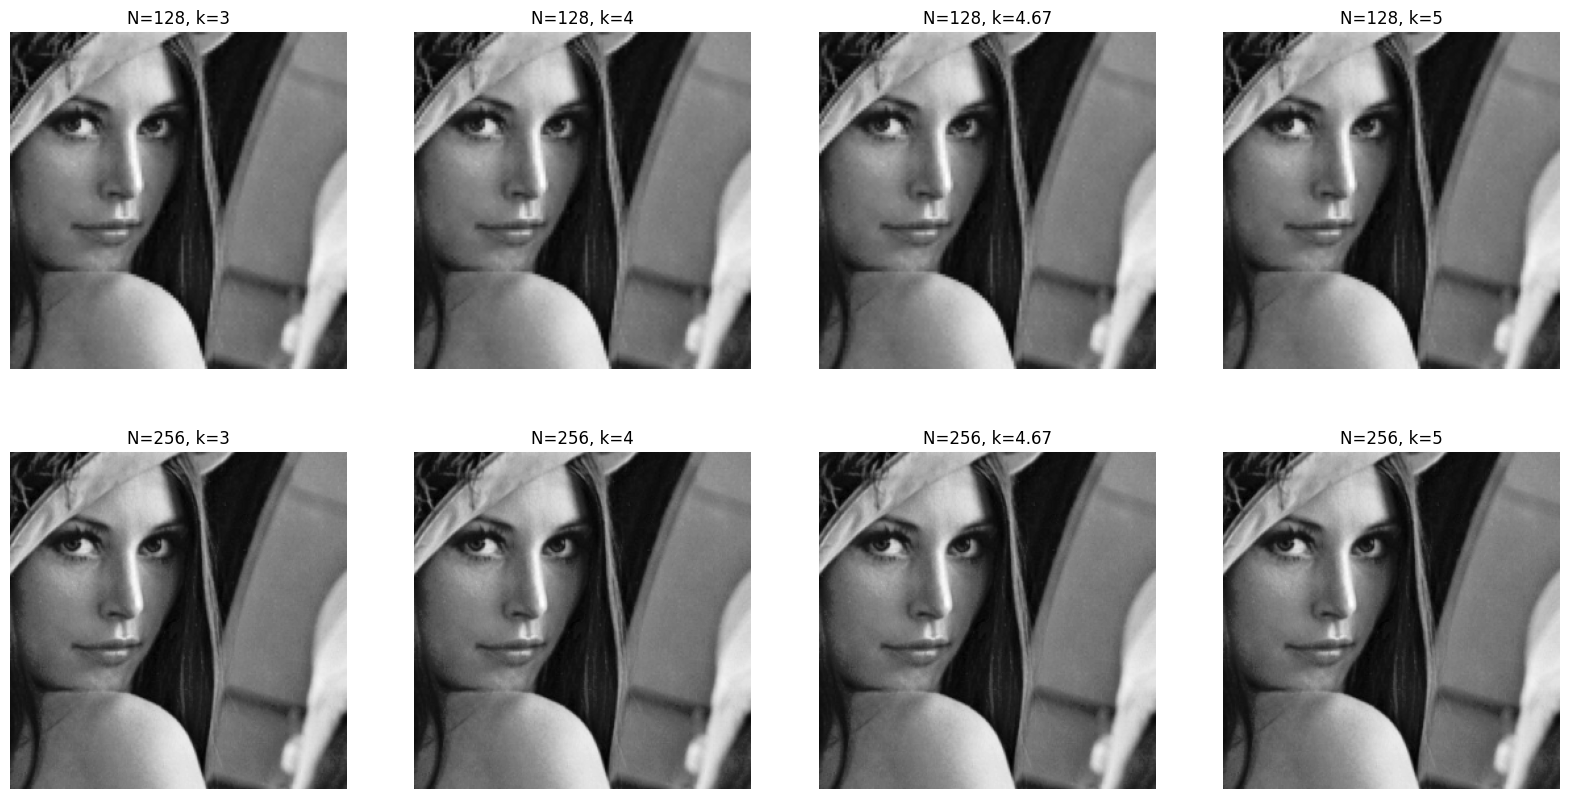

In [9]:
def iso(img, N, k):
    res = cv2.resize(img, (N,N))
    return res * ((2**k-1)/255)

img = cv2.imread('face.tif', cv2.IMREAD_GRAYSCALE)

Ns = [128, 256]
ks = [3, 4, 4.67, 5]
_, ax = plt.subplots(len(Ns), len(ks), figsize=(len(ks)*5, len(Ns)*5))

for i,N in enumerate(Ns):
    for j,k in enumerate(ks):
        ax[i][j].imshow(iso(img, N, k), cmap='gray')
        ax[i][j].set_title(f'N={N}, k={k}')
        ax[i][j].axis('off')
plt.show()